# Importing Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
#Importing Wine dataset
df=pd.read_csv('winedataset.csv')

In [4]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Analysis: 1.This implies that there are no outliers as no significant difference between mean and median can be seen.
2.There are no missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  diluted wines         178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


Analysis: No categorical data. Therefore, no encoding needed.

In [6]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

# Exploratory Data Analysis

Univariate analysis

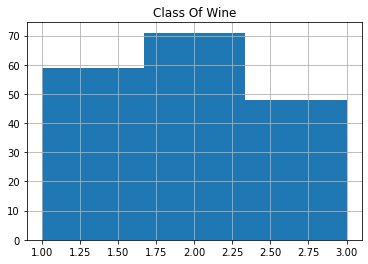

In [7]:
df.hist('Class',bins=3)
plt.title('Class Of Wine')
plt.show()

This implies that the class of wines are reasonably balanced.

Bivariate Analysis

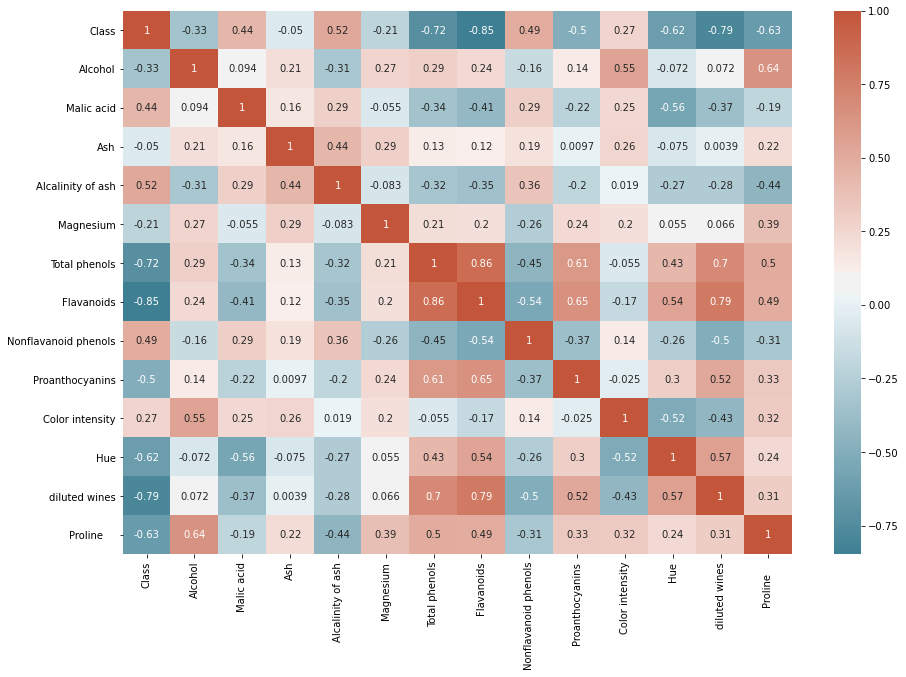

In [8]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Analysis:
    1.Total phenols, Flavanoids, Diluted wines are very negatively correlated to each other.
    2.Alcalinity of ash, NonFlavanoid phenols are positively correlated to each other.

# Handling Outliers

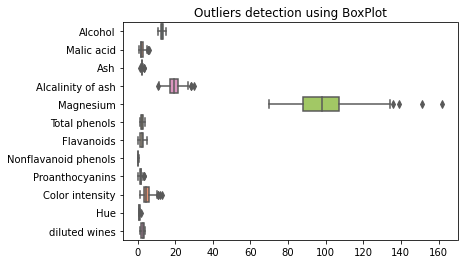

In [9]:
sns.boxplot(data=df[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines']],orient='h',palette='Set2')
plt.title('Outliers detection using BoxPlot')
plt.show()

There are some outliers we can use z-score to remove outliers.

In [10]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

In [11]:
print('Orignal shape',df.shape,'nNew shape',new_df.shape)

Orignal shape (178, 14) nNew shape (168, 14)


# Checking Skewness

In [12]:
new_df.skew()

Class                   0.117053
Alcohol                -0.028038
Malic acid              0.966253
Ash                    -0.250438
Alcalinity of ash       0.104774
Magnesium               0.566522
Total phenols           0.132108
Flavanoids             -0.077205
Nonflavanoid phenols    0.481810
Proanthocyanins         0.360217
Color intensity         0.732580
Hue                    -0.137430
diluted wines          -0.282514
Proline                 0.744773
dtype: float64

As some of the attributes are negatively correlated to each other therefore we will keep all the data.

# Model Training

In [13]:
x=new_df.drop('Class',axis=1)    
y=new_df['Class']   #Target variable

# Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
best_rstate=0
accu=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
print(f"Best accuracy {accu*100} found on random state {best_rstate}")
    

Best accuracy 100.0 found on random state 0


# Splitting data

Keeping random state = 0

In [18]:
x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=0.25,random_state=0)

# Finding Best Model

SVC with kernels rbf and poly

In [51]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9761904761904762
[[11  0  0]
 [ 0 17  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.94      0.97        18
           3       0.93      1.00      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42



In [52]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9761904761904762
[[11  0  0]
 [ 0 18  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.95      1.00      0.97        18
           3       1.00      0.92      0.96        13

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



Decision Tree Classifier

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9047619047619048
[[11  0  0]
 [ 1 15  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        11
           2       0.94      0.83      0.88        18
           3       0.86      0.92      0.89        13

    accuracy                           0.90        42
   macro avg       0.90      0.92      0.91        42
weighted avg       0.91      0.90      0.90        42



In [54]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9523809523809523
[[11  0  0]
 [ 0 16  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.89      0.94        18
           3       0.87      1.00      0.93        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.96        42
weighted avg       0.96      0.95      0.95        42



# Ensemble Methods

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=113)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9523809523809523
[[11  0  0]
 [ 0 16  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.89      0.94        18
           3       0.87      1.00      0.93        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.96        42
weighted avg       0.96      0.95      0.95        42



In [56]:
from sklearn.ensemble import AdaBoostClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=113)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9523809523809523
[[11  0  0]
 [ 0 16  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.89      0.94        18
           3       0.87      1.00      0.93        13

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.96        42
weighted avg       0.96      0.95      0.95        42



Now, we conclude that SVC model gives us the best accuracy (97.6 %) among all the models.

# Hyper Parameter Tuning

As our model is already showing a high level of accuracy therefore there is no need of Hyper Parameter Tuning.

# Serialization

In [61]:
import joblib
joblib.dump(svc,"winepro.pkl")

['winepro.pkl']